In [2]:
# # Если нужен GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [1]:
# !pip install ultralytics
from ultralytics import YOLO

import torch

In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [3]:
# yolo11n.pt - nano
# yolo11s.pt - small
# yolo11m.pt - medium
# yolo11l.pt - large
# yolo11x.pt - extra large

model = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 52.5MB/s]


In [5]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

# print("Path to dataset files:", path)

100%|██████████| 4.43G/4.43G [02:17<00:00, 34.6MB/s]

Extracting files...


Path to dataset files: /home/s2pac/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3


In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import yaml

In [11]:
%%writefile /home/s2pac/ElbrusBootcamp/fareselmenshawii/data.yaml

train: /content/kaggle/input/face-detection-dataset/images/train
val: /content/kaggle/input/face-detection-dataset/images/val

nc: 1
names: ['Human_faces']

Writing /home/s2pac/ElbrusBootcamp/fareselmenshawii/data.yaml


In [12]:
# Train the model
# Здесь можно найти все знакомые нам аргументы обучения(batch_size, epochs, optimizer, и тд)
# https://docs.ultralytics.com/ru/modes/train/#resuming-interrupted-trainings

results = model.train(
    data="/home/s2pac/ElbrusBootcamp/fareselmenshawii/data.yaml",
    epochs=15,
    imgsz=320,
    batch=8,
    device=DEVICE)

New https://pypi.org/project/ultralytics/8.3.150 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.148 🚀 Python-3.12.10 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060, 7808MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/s2pac/ElbrusBootcamp/fareselmenshawii/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, n

100%|██████████| 5.35M/5.35M [00:00<00:00, 22.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1559.8±2791.0 MB/s, size: 229.5 KB)


train: Scanning /home/s2pac/ElbrusBootcamp/fareselmenshawii/face-detection-dataset/versions/3/labels/train... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [00:03<00:00, 4439.83it/s]


train: New cache created: /home/s2pac/ElbrusBootcamp/fareselmenshawii/face-detection-dataset/versions/3/labels/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1028.9±1004.0 MB/s, size: 308.9 KB)


val: Scanning /home/s2pac/ElbrusBootcamp/fareselmenshawii/face-detection-dataset/versions/3/labels/val... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:00<00:00, 3920.80it/s]

val: New cache created: /home/s2pac/ElbrusBootcamp/fareselmenshawii/face-detection-dataset/versions/3/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.44G      1.418     0.9841      1.138          6        320: 100%|██████████| 1674/1674 [01:50<00:00, 15.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 19.74it/s]


                   all       3347      10299      0.797      0.567      0.639      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.93G      1.368     0.9076      1.125         14        320: 100%|██████████| 1674/1674 [01:38<00:00, 17.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:09<00:00, 22.14it/s]


                   all       3347      10299      0.873      0.657      0.731      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.99G      1.322     0.8521        1.1         12        320: 100%|██████████| 1674/1674 [01:37<00:00, 17.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.73it/s]


                   all       3347      10299      0.887      0.671      0.752      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.06G      1.277     0.8001      1.082          3        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.59it/s]


                   all       3347      10299      0.882       0.69       0.77      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.13G      1.242     0.7562       1.07         11        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.62it/s]


                   all       3347      10299      0.887      0.706      0.789      0.499
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.19G      1.218     0.7101      1.066          8        320: 100%|██████████| 1674/1674 [01:40<00:00, 16.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.72it/s]


                   all       3347      10299      0.886      0.695       0.78      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.26G      1.193     0.6868      1.051          3        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:09<00:00, 21.14it/s]


                   all       3347      10299      0.884      0.708      0.784      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.32G      1.181     0.6594      1.047          7        320: 100%|██████████| 1674/1674 [01:38<00:00, 16.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:09<00:00, 21.13it/s]


                   all       3347      10299      0.881      0.729      0.802      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.39G      1.162     0.6386      1.036          7        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.78it/s]

                   all       3347      10299      0.885      0.726      0.803      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.59G      1.143     0.6168      1.029          2        320: 100%|██████████| 1674/1674 [01:40<00:00, 16.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.98it/s]

                   all       3347      10299      0.889      0.739      0.813      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.66G       1.13     0.6007      1.023          2        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.88it/s]

                   all       3347      10299      0.893      0.742      0.817      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.72G      1.107     0.5798       1.01          4        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.82it/s]

                   all       3347      10299      0.889      0.751      0.826       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.87G      1.092      0.563      1.006          3        320: 100%|██████████| 1674/1674 [01:40<00:00, 16.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.76it/s]

                   all       3347      10299      0.889      0.759       0.83      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.96G      1.078      0.545     0.9992          2        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.94it/s]


                   all       3347      10299      0.896       0.76      0.832       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.09G      1.059     0.5244     0.9903          4        320: 100%|██████████| 1674/1674 [01:39<00:00, 16.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.75it/s]

                   all       3347      10299      0.893      0.766      0.838      0.552



15 epochs completed in 0.463 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.148 🚀 Python-3.12.10 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060, 7808MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:10<00:00, 20.72it/s]


                   all       3347      10299      0.893      0.766      0.838      0.552
Speed: 0.0ms preprocess, 1.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


In [13]:
url = "https://t4.ftcdn.net/jpg/03/27/54/03/360_F_327540326_fTI1gu7e3qXgqSKmBd7y8dDSCe6mYAZ3.jpg"

results = model.predict(url, conf=0.8)

100%|██████████| 54.2k/54.2k [00:00<00:00, 1.36MB/s]

image 1/1 /home/s2pac/ElbrusBootcamp/ZhenyaProject/360_F_327540326_fTI1gu7e3qXgqSKmBd7y8dDSCe6mYAZ3.jpg: 224x320 6 Human_facess, 37.8ms
Speed: 0.9ms preprocess, 37.8ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 320)


In [15]:
# Process results list
for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen

Окно или вкладка откроются в текущем сеансе браузера.



0: 352x480 9 Human_facess, 5.9ms
Speed: 3.2ms preprocess, 5.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 480)
Результат сохранён в blurred_output.jpg


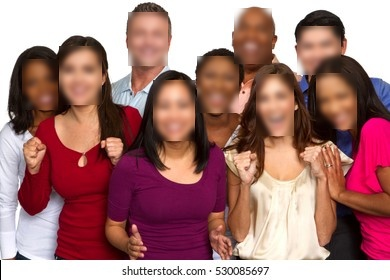

<Figure size 1200x800 with 1 Axes>

In [25]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Путь к обученной модели
model_path = "/home/s2pac/ElbrusBootcamp/ZhenyaProject/runs/detect/train/weights2/best.pt"

# Путь к тестовому изображению (или URL)
image_path = "https://www.shutterstock.com/image-photo/excited-multiethnic-group-people-260nw-530085697.jpg"

# Загрузка модели
model = YOLO(model_path)

# Загрузка изображения с обработкой ошибок
try:
    if image_path.startswith("http"):
        import requests
        from io import BytesIO
        response = requests.get(image_path, timeout=10)
        response.raise_for_status()  # Проверка на ошибки HTTP
        image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
    else:
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Не удалось загрузить изображение по пути: {image_path}")
except Exception as e:
    print(f"Ошибка загрузки изображения: {e}")
    raise

# Конвертация из BGR (OpenCV) в RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Предсказание с обработкой возможных ошибок
try:
    results = model.predict(image, conf=0.3)
except Exception as e:
    print(f"Ошибка при предсказании: {e}")
    raise

# Функция для размытия bounding box
def blur_bbox(image, bbox, blur_strength=15):
    x1, y1, x2, y2 = map(int, bbox)
    roi = image[y1:y2, x1:x2]
    blurred_roi = cv2.GaussianBlur(roi, (blur_strength, blur_strength), 0)
    image[y1:y2, x1:x2] = blurred_roi
    return image

# Применение размытия к каждому обнаруженному лицу
for result in results:
    for box in result.boxes:
        bbox = box.xyxy[0].cpu().numpy()  # Получаем координаты bbox [x1, y1, x2, y2]
        image_rgb = blur_bbox(image_rgb, bbox)

    # Сохранение результата (в BGR для OpenCV)
    output_path = "blurred_output.jpg"
    try:
        cv2.imwrite(output_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
        print(f"Результат сохранён в {output_path}")
        
        # Дополнительный вывод изображения через IPython.display
        display(Image(filename=output_path))
    except Exception as e:
        print(f"Ошибка при сохранении изображения: {e}")

    # Показ результата через matplotlib с увеличенным размером
    plt.figure(figsize=(12, 8), dpi=100)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.tight_layout()  # Улучшает расположение элементов
    plt.show()